<a href="https://colab.research.google.com/github/sripriyakonjarla/Machine_Learning/blob/main/bart_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from an Excel file
data = pd.read_excel('bart_embeddings.xlsx')

# Assume the last column is the target variable
X_train = data.iloc[:, :-1]  # Features
y_train = data.iloc[:, -1]    # Target variable



from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "CatBoost": CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = {
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    }

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: SVM
  Accuracy: 0.631
  Precision: 0.6395
  Recall: 0.6272
  F1 Score: 0.6321
Model: KNN
  Accuracy: 0.5655
  Precision: 0.5819
  Recall: 0.5594
  F1 Score: 0.5668
Model: Decision Tree
  Accuracy: 0.5595
  Precision: 0.5621
  Recall: 0.5576
  F1 Score: 0.5595
Model: Gaussian Naive Bayes
  Accuracy: 0.5089
  Precision: 0.5235
  Recall: 0.5422
  F1 Score: 0.4977
Model: Random Forest
  Accuracy: 0.5863
  Precision: 0.6094
  Recall: 0.5735
  F1 Score: 0.5825
Model: Logistic Regression
  Accuracy: 0.5655
  Precision: 0.5675
  Recall: 0.5702
  F1 Score: 0.5686
Model: MLP
  Accuracy: 0.6101
  Precision: 0.6194
  Recall: 0.605
  F1 Score: 0.6101
Model: XGBoost
  Accuracy: 0.6042
  Precision: 0.622
  Recall: 0.5957
  F1 Score: 0.6025
Model: CatBoost
  Accuracy: 0.6012
  Precision: 0.6098
  Recall: 0.594
  F1 Score: 0.599
Model: AdaBoost
  Accuracy: 0.5565
  Precision: 0.5789
  Recall: 0.5423
  F1 Score: 0.5515
Model: Extra Trees
  Accuracy: 0.5804
  Precision: 0.5904
  Recall: 0.5685
  F

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Define the kNN model
knn = KNeighborsClassifier()

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',  # Change this to any other scoring metric if needed
    random_state=42,
    n_jobs=-1
)

# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

best_knn = random_search.best_estimator_

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation on the best model using StratifiedKFold
cv_score = cross_validate(best_knn, X_train, y_train, cv=cv,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                          return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics:", results)


Best Parameters: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}
Evaluation Metrics: {'Accuracy Mean': 0.6228, 'Accuracy STD': 0.0507, 'Precision Mean': 0.6349, 'Precision STD': 0.0508, 'Recall Mean': 0.6223, 'Recall STD': 0.0511, 'F1 Mean': 0.6254, 'F1 STD': 0.0513}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from an Excel file
data = pd.read_excel('bart_embeddings.xlsx')

# Assume the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]    # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

In [ ]:
from catboost import CatBoostClassifier

# Define the CatBoost model
catboost = CatBoostClassifier(silent=True)

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'iterations': [50, 100, 200],
    'depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=param_distributions,
    n_iter=20,
    cv=10,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("CatBoost Best Parameters:", random_search.best_params_)

# Perform cross-validation on the best model
best_catboost = random_search.best_estimator_
cv_score = cross_validate(best_catboost, X_train, y_train, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

print("CatBoost Evaluation Metrics:", results)


CatBoost Best Parameters: {'learning_rate': 0.2, 'iterations': 200, 'depth': 4}
CatBoost Evaluation Metrics: {'Accuracy Mean': 0.6414, 'Accuracy STD': 0.0376, 'Precision Mean': 0.6531, 'Precision STD': 0.0395, 'Recall Mean': 0.6427, 'Recall STD': 0.0408, 'F1 Mean': 0.6447, 'F1 STD': 0.0388}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',  # Change this to any other scoring metric if needed
    random_state=42,
    n_jobs=-1
)

# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

best_gb = random_search.best_estimator_

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation on the best model using StratifiedKFold
cv_score = cross_validate(best_gb, X_train, y_train, cv=cv,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                          return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics:", results)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.3}
Evaluation Metrics: {'Accuracy Mean': 0.6355, 'Accuracy STD': 0.0349, 'Precision Mean': 0.6492, 'Precision STD': 0.0397, 'Recall Mean': 0.6352, 'Recall STD': 0.036, 'F1 Mean': 0.6382, 'F1 STD': 0.0357}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

# Define the Extra Trees model
extra_trees_model = ExtraTreesClassifier()

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=extra_trees_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',  # Change this to any other scoring metric if needed
    random_state=42,
    n_jobs=-1
)

# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

best_extra_trees = random_search.best_estimator_

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation on the best model using StratifiedKFold
cv_score = cross_validate(best_extra_trees, X_train, y_train, cv=cv,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                          return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics:", results)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Evaluation Metrics: {'Accuracy Mean': 0.637, 'Accuracy STD': 0.0513, 'Precision Mean': 0.6567, 'Precision STD': 0.0591, 'Recall Mean': 0.6324, 'Recall STD': 0.0516, 'F1 Mean': 0.6382, 'F1 STD': 0.0526}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

# Define the Naive Bayes model
naive_bayes_model = GaussianNB()

# Since Naive Bayes has fewer hyperparameters compared to other models,
# we can define a simple parameter grid for tuning.
param_distributions = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}

# Set up the RandomizedSearchCV
random_search_nb = RandomizedSearchCV(
    estimator=naive_bayes_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',  # Change this to any other scoring metric if needed
    random_state=42,
    n_jobs=-1
)

# Fit the model to find the best parameters
random_search_nb.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters for Naive Bayes:", random_search_nb.best_params_)

best_naive_bayes = random_search_nb.best_estimator_

# Use StratifiedKFold for cross-validation
cv_nb = StratifiedKFold(n_splits=10)

# Perform cross-validation on the best model using StratifiedKFold
cv_score_nb = cross_validate(best_naive_bayes, X_train, y_train, cv=cv_nb,
                             scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                             return_train_score=False)

# Collect and round the results
results_nb = {
    'Accuracy Mean': round(cv_score_nb['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score_nb['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score_nb['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score_nb['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score_nb['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score_nb['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score_nb['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score_nb['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics for Naive Bayes:", results_nb)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Evaluation Metrics for Naive Bayes: {'Accuracy Mean': 0.5216, 'Accuracy STD': 0.0378, 'Precision Mean': 0.5329, 'Precision STD': 0.0415, 'Recall Mean': 0.5473, 'Recall STD': 0.0377, 'F1 Mean': 0.5166, 'F1 STD': 0.0401}


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# No hyperparameters to tune, so we can fit and evaluate directly
nb.fit(X_train, y_train)

# Perform cross-validation on the model
cv_score = cross_validate(nb, X_train, y_train, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 3: Train the Naive Bayes model
nb = GaussianNB(var_smoothing=1e-9)  # Apply Laplace smoothing
nb.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate using Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10)

cv_score = cross_validate(nb, X_train_resampled, y_train_resampled, cv=skf,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                          return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

print("Naive Bayes Evaluation Metrics:", results)



Naive Bayes Evaluation Metrics: {'Accuracy Mean': 0.5585, 'Accuracy STD': 0.0304, 'Precision Mean': 0.5577, 'Precision STD': 0.0353, 'Recall Mean': 0.5585, 'Recall STD': 0.0304, 'F1 Mean': 0.5464, 'F1 STD': 0.0346}


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True,False],
    'class_weight': ['balanced']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=5,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf = random_search.best_estimator_

# Perform cross-validation on the best Random Forest model
cv_score = cross_validate(best_rf, X_train, y_train, cv=5,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics:", results)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}
Evaluation Metrics: {'Accuracy Mean': 0.6332, 'Accuracy STD': 0.0176, 'Precision Mean': 0.6477, 'Precision STD': 0.0294, 'Recall Mean': 0.6307, 'Recall STD': 0.0197, 'F1 Mean': 0.6357, 'F1 STD': 0.0208}


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    n_iter=5,
    cv=10,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Logistic Regression Best Parameters:", random_search.best_params_)

# Perform cross-validation on the best model
best_log_reg = random_search.best_estimator_
cv_score = cross_validate(best_log_reg, X_train, y_train, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

print("Logistic Regression Evaluation Metrics:", results)


Logistic Regression Best Parameters: {'penalty': 'l2', 'C': 0.01}
Logistic Regression Evaluation Metrics: {'Accuracy Mean': 0.6258, 'Accuracy STD': 0.0307, 'Precision Mean': 0.6265, 'Precision STD': 0.0322, 'Recall Mean': 0.6365, 'Recall STD': 0.033, 'F1 Mean': 0.6273, 'F1 STD': 0.0321}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

ada = AdaBoostClassifier(
    estimator=base_estimator,
    random_state=42
)

param_distributions = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # How much each estimator contributes
    'estimator__max_depth': [3, 5, 7]  # Max depth of the decision tree (base estimator)
}



random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_distributions,
    n_iter=10,
    cv=10,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("AdaBoost Best Parameters:", random_search.best_params_)

best_ada = random_search.best_estimator_
cv_score = cross_validate(
    best_ada, X_train, y_train, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False
)
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("AdaBoost Evaluation Metrics:", results)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Best Parameters: {'n_estimators': 50, 'learning_rate': 1.0, 'estimator__max_depth': 7}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Evaluation Metrics: {'Accuracy Mean': 0.6987, 'Accuracy STD': 0.0313, 'Precision Mean': 0.7038, 'Precision STD': 0.0237, 'Recall Mean': 0.6987, 'Recall STD': 0.0313, 'F1 Mean': 0.6976, 'F1 STD': 0.0245}


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
#pca
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

# Load the dataset
data = pd.read_excel('bart_embeddings.xlsx')

# Assume the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Scale the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to retain 99.99% of variance
pca = PCA(n_components=0.9999)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',  # Change this to any other scoring metric if needed
    random_state=42,
    n_jobs=-1
)

# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

best_gb = random_search.best_estimator_

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation on the best model using StratifiedKFold
cv_score = cross_validate(best_gb, X_train, y_train, cv=cv,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                          return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics:", results)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}
Evaluation Metrics: {'Accuracy Mean': 0.5775, 'Accuracy STD': 0.0466, 'Precision Mean': 0.5945, 'Precision STD': 0.053, 'Recall Mean': 0.5673, 'Recall STD': 0.0458, 'F1 Mean': 0.5747, 'F1 STD': 0.0475}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate

# Define the Extra Trees model
extra_trees_model = ExtraTreesClassifier()

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=extra_trees_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',  # Change this to any other scoring metric if needed
    random_state=42,
    n_jobs=-1
)

# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

best_extra_trees = random_search.best_estimator_

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation on the best model using StratifiedKFold
cv_score = cross_validate(best_extra_trees, X_train, y_train, cv=cv,
                          scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                          return_train_score=False)

# Collect and round the results
results = {
    'Accuracy Mean': round(cv_score['test_accuracy'].mean(), 4),
    'Accuracy STD': round(cv_score['test_accuracy'].std(), 4),
    'Precision Mean': round(cv_score['test_precision_macro'].mean(), 4),
    'Precision STD': round(cv_score['test_precision_macro'].std(), 4),
    'Recall Mean': round(cv_score['test_recall_macro'].mean(), 4),
    'Recall STD': round(cv_score['test_recall_macro'].std(), 4),
    'F1 Mean': round(cv_score['test_f1_macro'].mean(), 4),
    'F1 STD': round(cv_score['test_f1_macro'].std(), 4),
}

# Print the evaluation metrics
print("Evaluation Metrics:", results)


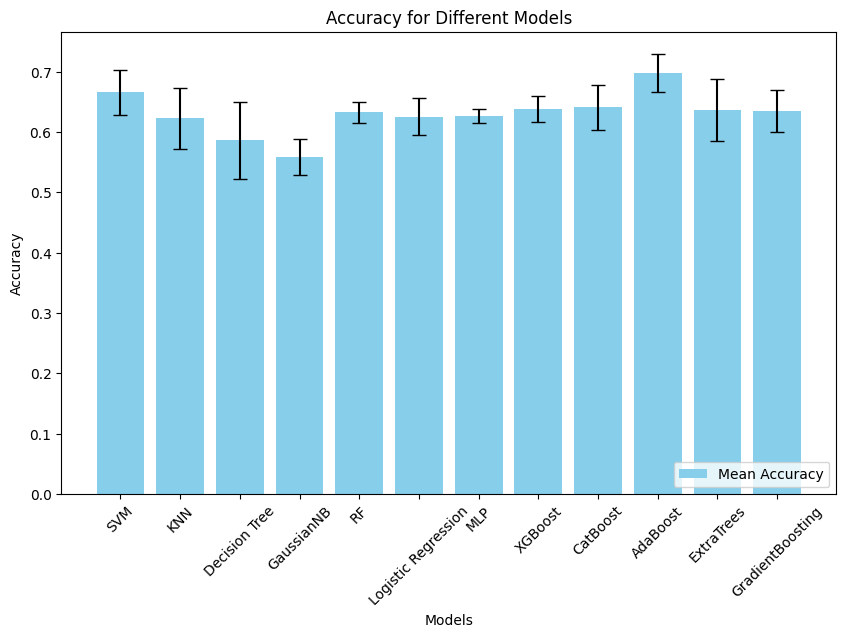

In [ ]:
#bart

import matplotlib.pyplot as plt
import numpy as np
models = ['SVM', 'KNN', 'Decision Tree', 'GaussianNB', 'RF', 'Logistic Regression',
          'MLP', 'XGBoost','CatBoost', 'AdaBoost','ExtraTrees','GradientBoosting']
mean_accuracy = [0.666, 0.6228, 0.5862, 0.5585, 0.6332, 0.6258, 0.6272, 0.6384,0.6414, 0.6987,0.637,0.6355]
std_accuracy = [0.0375, 0.0507, 0.0633, 0.0304, 0.0176, 0.0307, 0.012, 0.0212,0.0376, 0.0313,0.0513,0.0349]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, mean_accuracy, yerr=std_accuracy, capsize=5, color='skyblue', label='Mean Accuracy')

plt.xlabel( 'Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.xticks(rotation=45)
# Add legend
plt.legend(['Mean Accuracy', 'Standard Deviation'], loc='lower right')

plt.show()


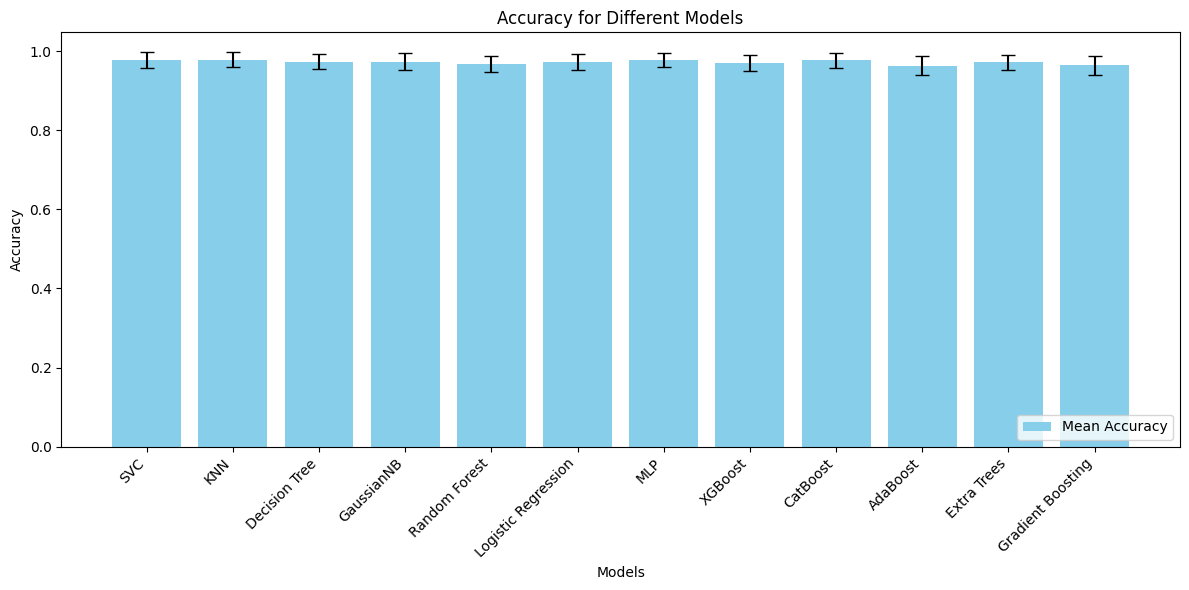

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracy data
models = ['SVC', 'KNN', 'Decision Tree', 'GaussianNB', 'Random Forest', 'Logistic Regression',
          'MLP', 'XGBoost', 'CatBoost', 'AdaBoost', 'Extra Trees', 'Gradient Boosting']
mean_accuracy = [0.9774, 0.9786, 0.9732, 0.9732, 0.9673, 0.9726, 0.9768, 0.9696, 0.9768, 0.9631, 0.9714, 0.9643]
std_accuracy = [0.0201, 0.0187, 0.0194, 0.0207, 0.02, 0.0201, 0.0173, 0.021, 0.0185, 0.0242, 0.0197, 0.0243]

# Create a figure and axis object
plt.figure(figsize=(12, 6))

# Plot the bars with error bars
bars = plt.bar(models, mean_accuracy, yerr=std_accuracy, capsize=5, color='skyblue')

# Labeling
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add the legend
plt.legend([bars], ['Mean Accuracy'], loc='lower right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


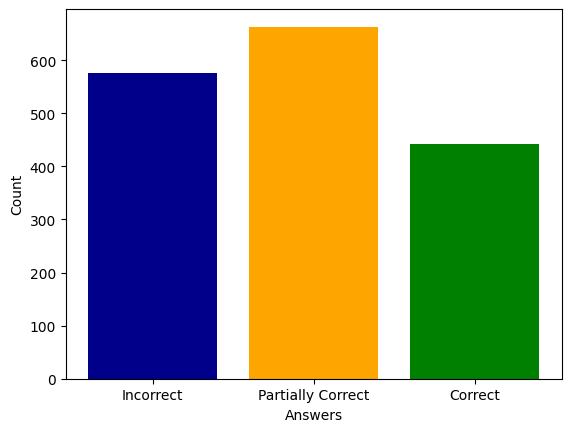

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('bart_embeddings.xlsx')

# Assume the last column is the target variable (y)
y = data.iloc[:, -1]   # Target variable

# Count the occurrences of 0, 1, and 2 in the target variable
counts = y.value_counts()

# Map values to categories
categories = {0: 'Incorrect', 1: 'Partially Correct', 2: 'Correct'}

# Prepare the data for plotting
labels = ['Incorrect', 'Partially Correct', 'Correct']
counts_list = [counts.get(0, 0), counts.get(1, 0), counts.get(2, 0)]

# Plotting the bar chart
plt.bar(labels, counts_list, color=['darkblue', 'orange', 'green'])
plt.xlabel('Answers')
plt.ylabel('Count')
plt.show()


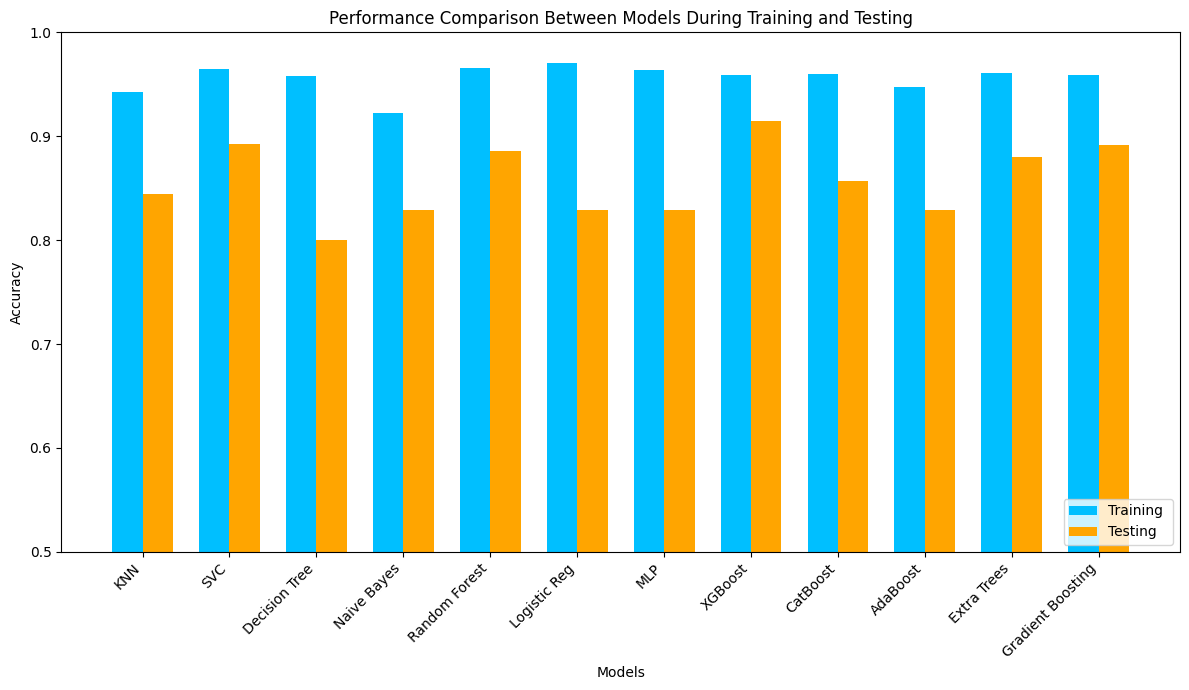

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Training and Testing
models = ['KNN', 'SVC', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Logistic Reg', 'MLP', 'XGBoost', 'CatBoost', 'AdaBoost', 'Extra Trees', 'Gradient Boosting']
training_accuracy = [0.9426, 0.9649, 0.9583, 0.9226, 0.9657, 0.9702, 0.9637, 0.9589, 0.9595, 0.9473, 0.9607, 0.9589]
testing_accuracy = [0.8443, 0.8923, 0.8, 0.8286, 0.8857, 0.8286, 0.8286, 0.9143, 0.8571, 0.8286, 0.8801, 0.8920 ]

# Set up the plot
x = np.arange(len(models))  # The label locations
width = 0.35  # The width of the bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Plot bars for Training and Testing Accuracy
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training ', color='deepskyblue')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing ', color='orange')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Performance Comparison Between Models During Training and Testing')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='lower right')

# Set y-axis limits to start from 0.5
ax.set_ylim(0.5, 1)

# Adjust layout to make room for labels
fig.tight_layout()

# Show the plot
plt.show()
